# Assignment 3

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Import different modules for using with the notebook
'''
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

from numpy.random import randint
from skimage import io
from ipywidgets import interact
from matplotlib.patches import Ellipse
'''
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from numpy.random import randint
from skimage import io
from ipywidgets import interact
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture as GMM_new
from sklearn.semi_supervised import label_propagation
from matplotlib.patches import Ellipse
import itertools
import warnings
warnings.filterwarnings('ignore')

# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

## Generate Random Data

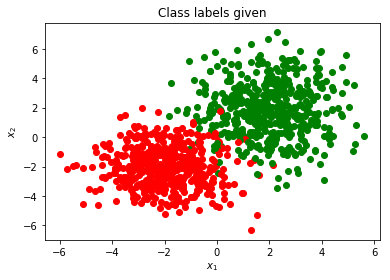

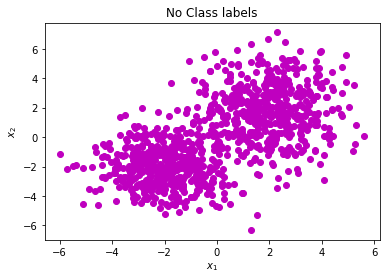

In [4]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

## K-means

Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.

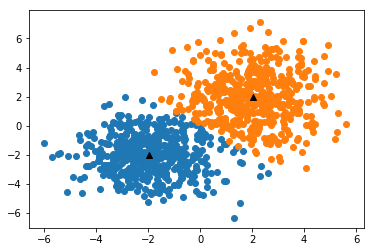

In [5]:
from kMeans import *
Xt = X.T
km = myKM()
km.train(Xt, 2)

plt.figure()

for lab in km.classes:
    plt.scatter(Xt[lab == km.y, 0], Xt[lab == km.y, 1])
    plt.scatter(km.u[lab, 0], km.u[lab, 1], c= 'black', marker = "^")
plt.show()


**Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

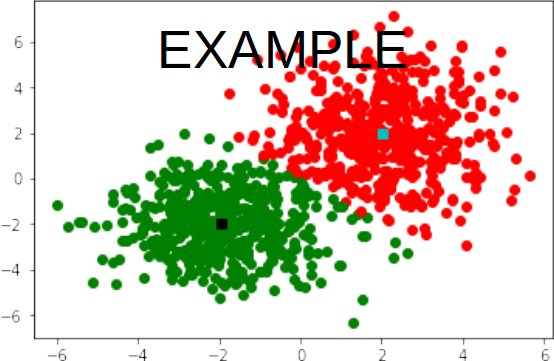

In [6]:
display(Image(filename='./kmeans.jpg'))

$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

## GMM

Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.

**Use your newly created function to cluster the above generated data set. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

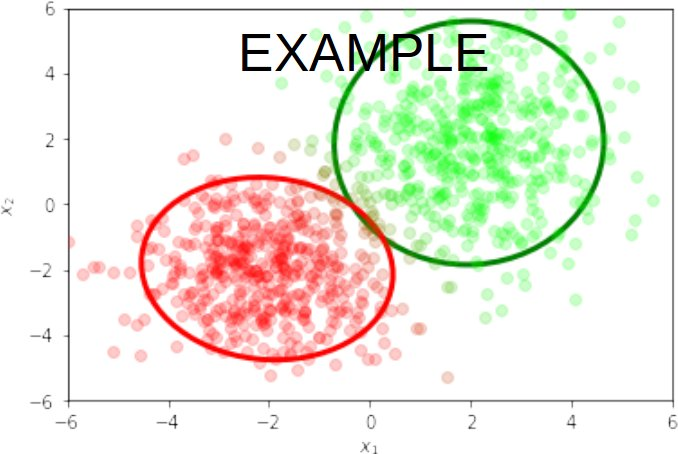

In [7]:
display(Image(filename='./gmm.jpg'))

# Perform K-means on an image

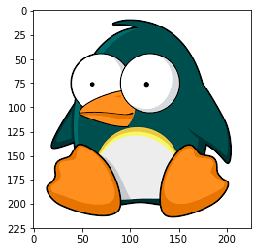

In [8]:
im = io.imread('./cartoon.png')
plt.imshow(im/np.max(im))
plt.show()

## Clustering of colors

Note that the colors in the image above are clustered around only a few colors. **You need to find the clusters using the k-means algorithm in scikit-learn. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

*Note:* Before you produce the plot using plt.imshow(), make sure the image data is op type "unint8", i.e. set dtype = "uint8"

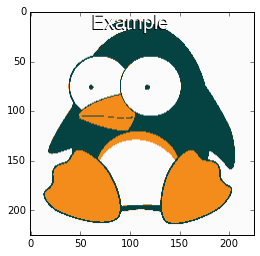

In [9]:
display(Image(filename='./wm_cartoon_repro.png'))

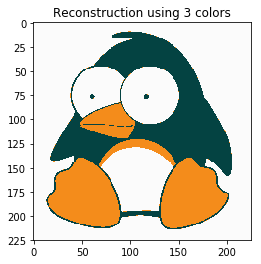

In [14]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def image_vec_quantize(n_vec, flat_image, return_image=False):
    # Create and fit Kmeans model
    model = KMeans(n_clusters=n_vec, init='k-means++',
        n_init=(5-np.int(np.log(n_vec))))
    
    means = model.fit(flat_image)
    # Predict new colors for image (may only be one of means)
    new_colors = means.predict(flat_image)
    # Create new cartoon using the function above and the new means
    new_image = recreate_image(means.cluster_centers_, new_colors, w, h)

    if(return_image):
        return new_image
    else:
        # Display the new image
        plt.figure()
        plt.title('Reconstruction using %d colors' % n_vec)
        plt.imshow(new_image)
        plt.show()
        
cartoon = io.imread('./cartoon.png')
cartoon = np.array(cartoon, dtype=np.uint8) / 255
w, h, d = original_shape = tuple(cartoon.shape)
flat_cartoon = cartoon.reshape((w*h, d))
image_vec_quantize(3, flat_cartoon)

In [16]:
flat_cartoon = cartoon.reshape((1, -1, 3))[0, :, :]
print(flat_cartoon)
unique_color_vectors = np.vstack({tuple(row) for row in flat_cartoon})
n_color_no_loss = unique_color_vectors.shape[0]
image_vec_quantize(n_color_no_loss, flat_cartoon)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


ValueError: Floating point image RGB values must be in the 0..1 range.

In [13]:
n_cartoons = 20
n_colors = 20
n_cols = np.linspace(1, n_colors, n_cartoons).astype(int)
cartoons = [image_vec_quantize(n_col, flat_cartoon, True) for n_col in n_cols]

fig = plt.figure(figsize=(10, np.ceil(n_cols.size/2)))
count = 0
for i in n_cols:
    ax = fig.add_subplot(np.ceil(n_cols.size/5), 5, 1 + count)
    ax.imshow(cartoons[count])
    count+=1
    plt.title('%d colors' % i)
    plt.axis('off')
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [ ]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

In [ ]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

## Inspect the different digit  images

In [ ]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


## GMM

Next, fit the data to a 10 component GMM model, using the scikit-learn package.

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

In [ ]:
data = digits.data

np.random.seed(1)
# Insert GMM code

In [ ]:
display(Image(filename='./wm_GMM.png'))

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal